Identify 2 proprotional, 2 non proportional and 2 complex models to test

In [2]:
import sksurv as sks
import sksurv.preprocessing
import sksurv.metrics
import sksurv.datasets
import sksurv.linear_model
import sksurv.ensemble

from pathlib import Path
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import sklearn as skl
import scipy.stats as sp

import pymc as pm
import pymc_bart as pmb
import pandas as pd

import importlib
import mlflow as ml
import simsurv_func as ssf
import subprocess

In [ ]:
plt.ioff()
np.random.seed(99)

# Proprotional

In [ ]:
OUTPUTS = "outputs"
ALPHA = 3
LAMBDA = "np.exp(2 + 0.4*(x_mat[:,0] + x_mat[:,1]))"
TRAIN_CSV = "outputs/train.csv"
RBART_CSV = "outputs/rbart_surv.csv"
N = 100
# T = 30
X_VARS = 2
CENS_SCALE = 5 # 40
CENS_IND = True

sv_mat, x_mat, lmbda, a, tlat, cens, t_event, status, T = ssf.sim_surv(
                N=N, 
                # T=T,
                x_vars=X_VARS,
                a = ALPHA,
                lambda_f = LAMBDA,
                cens_scale=CENS_SCALE,
                cens_ind = True,
                err_ind = False)


x_out, x_idx, x_cnt = ssf.get_x_info(x_mat)
event_calc, cens_calc = ssf.get_status_perc(status)
t_mean, t_max = ssf.get_event_time_metric(t_event)
train = ssf.get_train_matrix(x_mat, t_event, status)
title = "actual_survival"
ssf.plot_sv(x_mat, sv_mat, T, title=title, save = False, show=True, dir=OUTPUTS)

print(f"cens_calc: {cens_calc} \
    \nt_mean: {t_mean} \
    \nt_max: {t_max}")


In [ ]:
OUTPUTS = "outputs"
ALPHA = 2
LAMBDA = "np.exp(2 + .3*(x_mat[:,0] + x_mat[:,1] + x_mat[:,2] + 2* x_mat[:,3]))"
TRAIN_CSV = "outputs/train.csv"
RBART_CSV = "outputs/rbart_surv.csv"
N = 100
# T = 30
X_VARS = 4
CENS_SCALE = 7
CENS_IND = True

sv_mat, x_mat, lmbda, a, tlat, cens, t_event, status, T = ssf.sim_surv(
                N=N, 
                # T=T,
                x_vars=X_VARS,
                a = ALPHA,
                lambda_f = LAMBDA,
                cens_scale=CENS_SCALE,
                cens_ind = CENS_IND,
                err_ind = False)


x_out, x_idx, x_cnt = ssf.get_x_info(x_mat)
event_calc, cens_calc = ssf.get_status_perc(status)
t_mean, t_max = ssf.get_event_time_metric(t_event)
train = ssf.get_train_matrix(x_mat, t_event, status)
title = "actual_survival"
ssf.plot_sv(x_mat, sv_mat, T, title=title, save = False, show=True, dir=OUTPUTS)

print(f"cens_calc: {cens_calc} \
    \nt_mean: {t_mean} \
    \nt_max: {t_max}")

# notes on alpha and lambda metrics
## Alpha
- alpha increase pulls the middle of each curve up and to the right.
- low alpha means quick drop
- high alpha means long wait for drop

## Lambda
- controls the rate of the curve
- high alpha is a long c curv down
- 3 components exp({base} + {cov_base_mult} ({coeff}*{cov})
- cov_vase_mult     controls generally the covariate effect [0,1]
- base              controls time out (bigger = longer)
- coef              controls specific covariate effects
- bigger lambda raises the curve

# Non-proprtional

In [ ]:
OUTPUTS = "outputs"
ALPHA = 2
ALPHA_F = "1 + 2 * x_mat[:,0]"
LAMBDA = "np.exp(2 + .4*(3 * x_mat[:,0] +  x_mat[:,1]))"
TRAIN_CSV = "outputs/train.csv"
RBART_CSV = "outputs/rbart_surv.csv"
N = 100
X_VARS = 2
CENS_SCALE = 5
CENS_IND = True

sv_mat, x_mat, lmbda, a, tlat, cens, t_event, status, T = ssf.sim_surv(
                N=N, 
                # T=T,
                x_vars=X_VARS,
                a = ALPHA,
                alpha_f = ALPHA_F,
                lambda_f = LAMBDA,
                cens_scale=CENS_SCALE,
                cens_ind = CENS_IND,
                err_ind = False)


x_out, x_idx, x_cnt = ssf.get_x_info(x_mat)
event_calc, cens_calc = ssf.get_status_perc(status)
t_mean, t_max = ssf.get_event_time_metric(t_event)
train = ssf.get_train_matrix(x_mat, t_event, status)
title = "actual_survival"
ssf.plot_sv(x_mat, sv_mat, T, title=title, save = False, show=True, dir=OUTPUTS)

print(f"cens_calc: {cens_calc} \
    \nt_mean: {t_mean} \
    \nt_max: {t_max}")

In [ ]:
OUTPUTS = "outputs"
ALPHA = 2
ALPHA_F = "1 + (1.5 * x_mat[:,0]) + x_mat[:,1]"
# LAMBDA = "np.exp(3 + 0.4*(x_mat[:,0] + 0.5*x_mat[:,1] + 1.2*x_mat[:,2] + 0.8*x_mat[:,3]))"
LAMBDA = "np.exp(2 + .2*(3 * x_mat[:,0] - 1.2*x_mat[:,1] + 2*x_mat[:,2]))"
# LAMBDA = "np.exp(2 + .4*(3 * x_mat[:,0] +  x_mat[:,1]))"
TRAIN_CSV = "outputs/train.csv"
RBART_CSV = "outputs/rbart_surv.csv"
N = 100
# T = 30
X_VARS = 3
CENS_SCALE = 4
CENS_IND = True

sv_mat, x_mat, lmbda, a, tlat, cens, t_event, status, T = ssf.sim_surv(
                N=N, 
                # T=T,
                x_vars=X_VARS,
                a = ALPHA,
                alpha_f = ALPHA_F,
                lambda_f = LAMBDA,
                cens_scale=CENS_SCALE,
                cens_ind = CENS_IND,
                err_ind = False)


x_out, x_idx, x_cnt = ssf.get_x_info(x_mat)
event_calc, cens_calc = ssf.get_status_perc(status)
t_mean, t_max = ssf.get_event_time_metric(t_event)
train = ssf.get_train_matrix(x_mat, t_event, status)
title = "actual_survival"
ssf.plot_sv(x_mat, sv_mat, T, title=title, save = False, show=True, dir=OUTPUTS)

print(f"cens_calc: {cens_calc} \
    \nt_mean: {t_mean} \
    \nt_max: {t_max}")

In [92]:
np.sin(2) * 0.8

0.7274379414605453

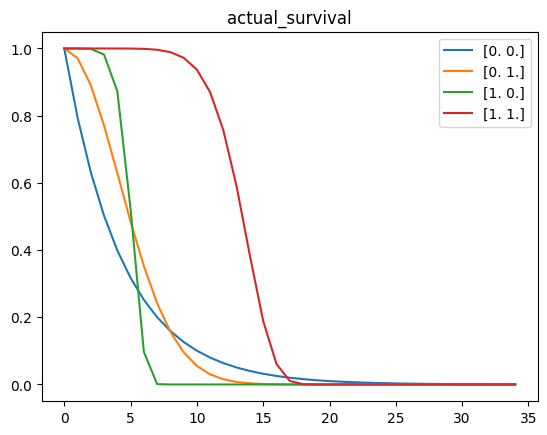

cens_calc: 0.0     
t_mean: 7.824     
t_max: 35.0


In [171]:
# Non Linear
OUTPUTS = "outputs"
ALPHA = 2
ALPHA_F = "1 + (6 * x_mat[:,0]) + x_mat[:,1]"
LAMBDA = "np.exp(1.5 + .2*x_mat[:,0] + .3*x_mat[:,1] + 0.8*np.sin(x_mat[:,0] * x_mat[:,1]))"
TRAIN_CSV = "outputs/train.csv"
RBART_CSV = "outputs/rbart_surv.csv"
N = 1000
# T = 30
X_VARS = 2
CENS_SCALE = 5
CENS_IND = False

sv_mat, x_mat, lmbda, a, tlat, cens, t_event, status, T = ssf.sim_surv(
                N=N, 
                # T=T,
                x_vars=X_VARS,
                a = ALPHA,
                alpha_f = ALPHA_F,
                lambda_f = LAMBDA,
                cens_scale=CENS_SCALE,
                cens_ind = CENS_IND,
                err_ind = False)


x_out, x_idx, x_cnt = ssf.get_x_info(x_mat)
event_calc, cens_calc = ssf.get_status_perc(status)
t_mean, t_max = ssf.get_event_time_metric(t_event)
train = ssf.get_train_matrix(x_mat, t_event, status)
title = "actual_survival"
ssf.plot_sv(x_mat, sv_mat, T, title=title, save = False, show=True, dir=OUTPUTS)

print(f"cens_calc: {cens_calc} \
    \nt_mean: {t_mean} \
    \nt_max: {t_max}")

In [172]:
# BART
M = 200 # number of trees
DRAWS = 200
TUNE = 500
CORES = 4

y_sk = ssf.get_y_sklearn(status, t_event)
x_sk = train.iloc[:,2:]

# tranform data long-form
b_tr_t, b_tr_delta, b_tr_x = ssf.surv_pre_train2(x_sk, y_sk)
# b_te_t, b_te_x = surv_pre_test(x_sk, y_sk)
b_te_x = ssf.get_bart_test(x_out, np.unique(b_tr_t))
off = sp.norm.ppf(np.mean(b_tr_delta))
# model bart

In [56]:
pd.set_option('display.max_rows', 500)
# pd.set_option("display.height", 500)

In [69]:
# b_tr_x[450:,:]
# b_tr_x.shape

In [70]:
# b_tr_t.shape
# b_tr_t

In [31]:
# train["X0"] == 1  train["X1"] == 1
# train.to_csv("train.csv")

In [159]:
# b_tr_x.sort(0)
# x_sk
# x_cnt

,X0,X1
0,1.0,0.0
1,0.0,1.0
2,1.0,1.0
3,0.0,0.0
4,0.0,1.0
...,...,...
3995,1.0,1.0
3996,1.0,1.0
3997,1.0,0.0
3998,0.0,1.0


Only 200 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
PGBART: [f]


Sampling 4 chains for 200 tune and 200 draw iterations (800 + 800 draws total) took 600 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [f, y_pred]


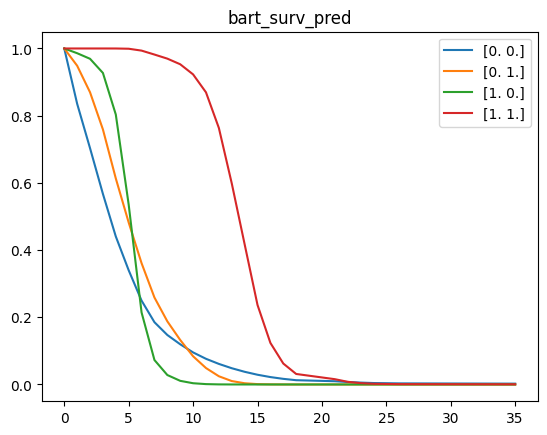

In [173]:
with pm.Model() as bart:
    x_data = pm.MutableData("x", b_tr_x)
    f = pmb.BART("f", X=x_data, Y=b_tr_delta, m=800, alpha = 0.99, beta=3,
        split_rules=[pmb.ContinuousSplitRule(), pmb.OneHotSplitRule(), pmb.OneHotSplitRule()])
    z = pm.Deterministic("z", f + off)
    mu = pm.Deterministic("mu", pm.math.invprobit(z))
    y_pred = pm.Bernoulli("y_pred", p=mu, observed=b_tr_delta, shape=x_data.shape[0])
    bdata = pm.sample(random_seed=2, draws=200, tune = 200, cores=4)

with bart:
# pm.set_data({"x":pd.DataFrame(test_x), "off":off_test})
    pm.set_data({"x":pd.DataFrame(b_te_x)})
    pp = pm.sample_posterior_predictive(bdata, var_names = ["y_pred", "f", "z", "mu"])

# transform to survival
bart_sv_fx = ssf.get_sv_fx(pp, x_out)
# bart_svt
bart_sv_t = np.unique(b_tr_t)

# add a time 0 with prob 1 
bart_sv_t = np.concatenate([np.array([0]), bart_sv_t])
bart_sv_val = [np.concatenate([np.array([1]), sv]) for sv in bart_sv_fx]

# log artif plot curves
title = "bart_surv_pred"
ssf.plot_sv(x_mat, bart_sv_val, t=bart_sv_t, title=title, save=False, show=True, dir="outputs")


In [150]:
bdata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data